In [68]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
#test image
A = np.array([[8,3,4,5],
              [7,6,4,5],
              [4,5,7,8],
              [6,5,5,6]])

# blur filter
F = np.ones((3,3))*1/9

# Another test image
X = np.array(  [[25, 100, 75, 49, 130],
                [50, 80, 0, 70, 100],
                [5, 10, 20, 30, 0],
                [60, 50, 12, 24, 32],
                [37, 53, 55, 21, 90],
                [140, 17, 0, 23, 222]])

# another filter
H = np.array([[1, 0, 1],
    [0, 1, 0],
    [0, 0, 1]])

# sharpen filter
Q = np.array( [[0, -1, 0],
               [-1, 5, -1],
               [0, -1, 0]] )

# Convolution2d algorithm

In [9]:
def pad_val(X, i, j, pad_val=None):
    if pad_val is None:
        return X[i][j]
    return pad_val
def conv(F, X, pad=None, out_pad_val=None):
    n = X.shape[0]
    m = X.shape[1]
    if pad is None:
        pad = F.shape[0]-1
    
    X_pad = np.zeros((n +2*pad, m+2*pad))
    for i in range(n):
        for j in range(m):
            if i-1 < 0 and j - 1 < 0:
                            # +1 due to the fact that range excludes the last index (2 for ex)
                            #from the range
                for p in range(pad+1):
                    for q in range(pad+1):
                        if p-pad >= 0 and q-pad >= 0:
                             X_pad[p][q] = X[i][j]
                        else:
                            val = pad_val(X,i,j, out_pad_val)
                            X_pad[p][q] = val
                   
            elif i - 1 < 0 and j-1 >= 0:
                if j == m-1:
                    for p in range(0, pad+1):
                        for q in range(pad+m-1, 2*pad+m):
                            if p-pad >= 0 and q == m-1 + pad:
                                X_pad[p][q] = X[i][j]
                            else:
                                val = pad_val(X,i,j, out_pad_val)
                                X_pad[p][q] = val
                else:
                    for p in range(0, pad+1):
                        if p -pad >=0:
                             X_pad[p][pad+j] = X[i][j]
                        else:
                            val = pad_val(X,i,j, out_pad_val)
                            X_pad[p][pad+j] = val
            elif i-1 >= 0 and j-1 < 0:
                if i == n-1:
                    for p in range(pad+n-1, 2*pad+n):
                        for q in range(0, pad+1):
                            if p == pad+n-1 and q-pad >=0 :
                                X_pad[p][q] = X[i][j]
                            else:
                                val = pad_val(X,i,j, out_pad_val)
                                X_pad[p][q] = val
                else:
                    for q in range(0, pad+1):
                        if q-pad >= 0:
                             X_pad[pad+i][q] = X[i][j]
                        else:
                            val = pad_val(X,i,j, out_pad_val)
                            X_pad[pad+i][q] = val
            elif i-1 >= 0 and j-1 >= 0:
                if i == n-1 and j==m-1:
                    for p in range(pad+n-1, 2*pad+n):
                        for q in range(pad+m-1, 2*pad+m):
                            if p == pad+n-1 and q == pad+m-1:
                                X_pad[p][q] = X[i][j]
                            else:
                                val = pad_val(X,i,j, out_pad_val)
                                X_pad[p][q] = val
                elif i == n-1 and j> 0 and j < m-1:
                    for p in range(pad+n-1, 2*pad+n):
                        if p == pad+n-1:
                            X_pad[p][j+pad] = X[i][j]
                        else:
                            val = pad_val(X,i,j, out_pad_val)
                            X_pad[p][j+pad] = val
                elif i == n-1 and j == 0:
                    for p in range(pad+n-1, 2*pad+n):
                        for q in range(0, pad+1):
                            if p == pad+n-1 and q-pad >= 0:
                                X_pad[p][q] = X[i][j]
                            else:
                                val = pad_val(X,i,j, out_pad_val)
                                X_pad[p][q] = val
                elif i > 0 and i < n-1 and j == m-1:
                    for q in range(pad+m-1, 2*pad+m):
                            if q == pad+m-1:
                                 X_pad[i+pad][q] = X[i][j]
                            else:
                                val = pad_val(X,i,j, out_pad_val)
                                X_pad[i+pad][q] = val
                else: 
                     X_pad[i+pad][j+pad] = X[i][j]
    filt_n = F.shape[0]
    filt_m = F.shape[1]
    first_row = filt_n/2
    first_col = filt_m/2
    
    out = np.zeros((n+2*pad-filt_n+1, m + 2*pad-filt_m+1))
    #print(X_pad)
    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            s = 0.0
            for p in range(F.shape[0]):
                for q in range(F.shape[1]):
                    s += F[p][q]*X_pad[i+filt_n-1-p][j+filt_m-1-q]
            out[i][j] = s        
    #print(out)
    return out             

# Test convolution on sample images (X and A)

In [ ]:
result1 = conv(F, A, pad=1)
result2 = conv(H,X, pad=1, out_pad_val=0.0) 

# Read an RGB image and create the grayscale equivalent

In [ ]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
img = mpimg.imread('sample_image.jpg') 
gray = rgb2gray(img)  


# Blur filter

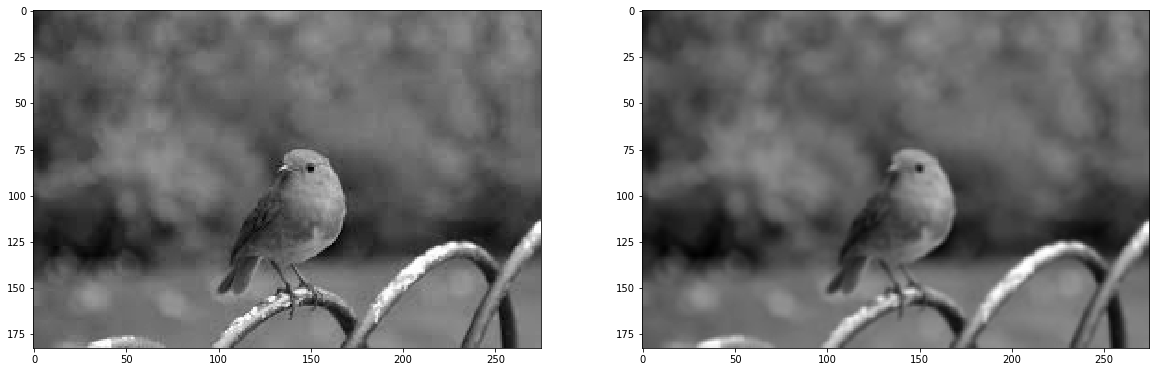

In [67]:
result1 = conv(F, gray, pad=1)
f = plt.figure(figsize=(20,15))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.imshow(gray, cmap=plt.get_cmap('gray'))
ax2.imshow(result1, cmap=plt.get_cmap('gray'))


# Sharpen filter

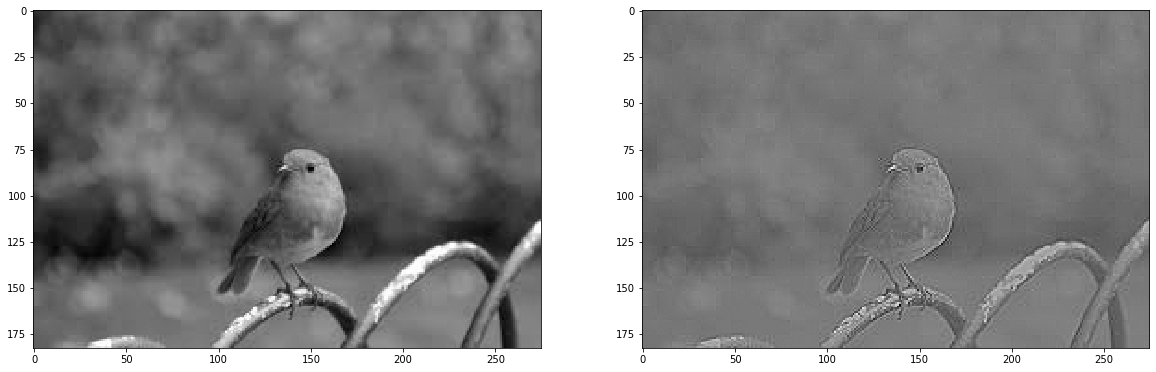

In [66]:
result2 = conv(Q, gray, pad=1)

f = plt.figure(figsize=(20,15))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.imshow(gray, cmap=plt.get_cmap('gray'))
ax2.imshow(result2, cmap=plt.get_cmap('gray'))


# Smoothing (original - blurred)

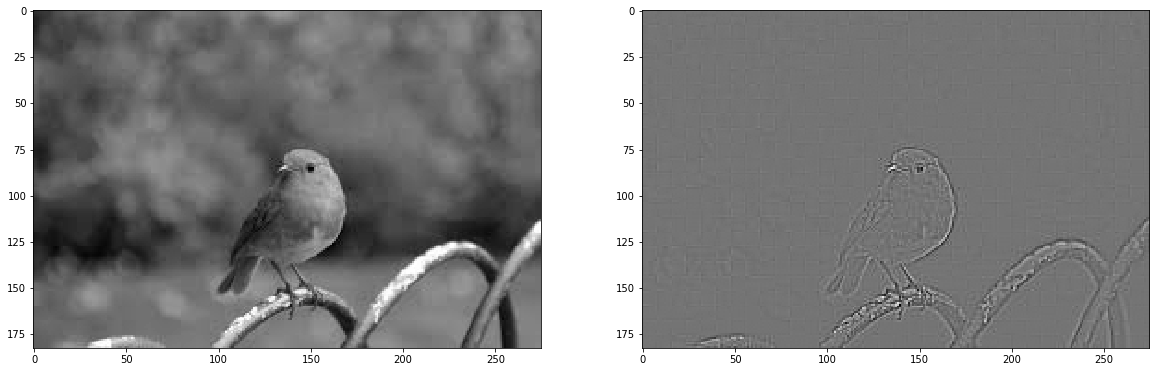

In [61]:
f = plt.figure(figsize=(20,15))
ax1 = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax1.imshow(gray, cmap=plt.get_cmap('gray'))
ax2.imshow(gray - result1, cmap=plt.get_cmap('gray'))